# Bandit Problem

In [378]:
# imports
from bandits import Bandit
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A list of ten bandit objects initialized in the list...

In [379]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [380]:
bandits[0].pullLever()

0.8112728275766004

## Greedy algorithm Implementation

In [381]:
def greedy(bandits,rewards):
        
    arms=len(bandits)
    
    bestbandit=rewards.argmax()
    reward=bandits[bestbandit].pullLever()
    rewards[bestbandit]+=reward

bandits = [Bandit(random.random()*4-2) for _ in range(10)]
rewards=np.zeros(len(bandits))
iterations=100

for _ in range(iterations):
    greedy(bandits,rewards)

print(sum(rewards))
print(rewards)



162.75424994919507
[-2.02461008e+00 -1.10919967e+00 -1.60329116e+00 -9.78408946e-02
  1.67589192e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


Plot the cumulative average of rewards as the number of iterations increases.

<Axes: title={'center': 'Cumulative rewards'}, xlabel='No. of Iterations', ylabel='Cumulative Reward'>

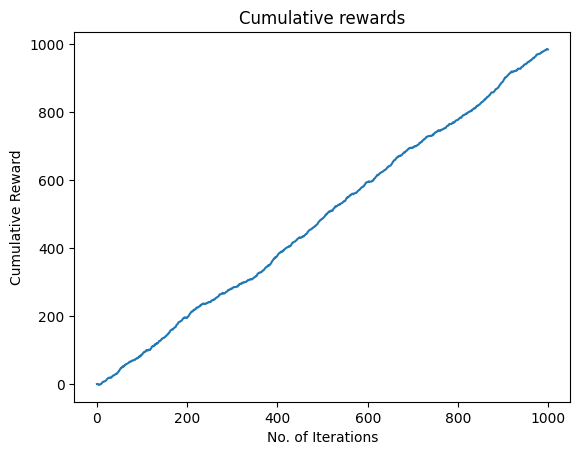

In [382]:
iterations=1000
bandits = [Bandit(random.random()*4-2) for _ in range(10)]
rewards=np.zeros(len(bandits))
cumav_rewards=np.zeros(iterations)

for i in range(iterations):
    greedy(bandits,rewards)

    cumav_rewards[i]=sum(rewards)

df=pd.DataFrame(cumav_rewards)
df.plot(title="Cumulative rewards",xlabel="No. of Iterations",ylabel="Cumulative Reward",legend=False)

## $\epsilon$-greedy Algorithm

In [383]:
def run_epsilon_greedy(bandits,rewards,epsilon):
    
    if np.random.random()<epsilon:
        bandit=np.random.randint(0,len(bandits)-1)
        rewards[bandit]+=bandits[bandit].pullLever()
    else:
        bestbandit=rewards.argmax()
        rewards[bestbandit]+=bandits[bestbandit].pullLever()

bandits = [Bandit(random.random()*4-2) for _ in range(10)]
rewards=np.zeros(len(bandits))
iterations=100
epsilon=0.01

for _ in range(iterations):
    run_epsilon_greedy(bandits,rewards,epsilon)

print(sum(rewards))
print(rewards)



30.084699157923776
[-0.67142238 30.39948285  0.          0.          0.          0.
  0.35663869  0.          0.          0.        ]


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

Text(0, 0.5, 'Cumulative average of rewards')

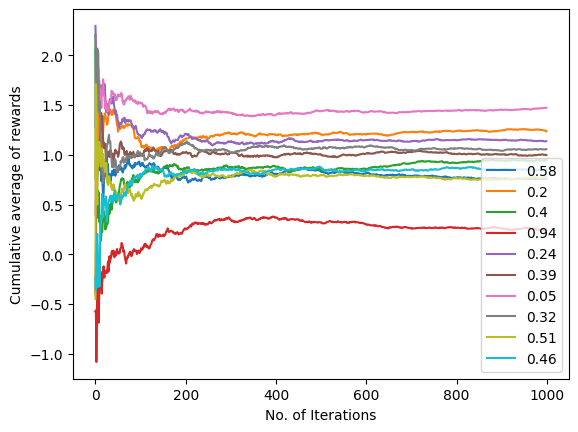

In [ ]:
iterations=1000
bandits = [Bandit(random.random()*4-2) for _ in range(10)]
epsilon_values=[]

for j in range(10):
    epsilon=np.random.random()
    epsilon_values+=[round(epsilon,2)]
    rewards=np.zeros(len(bandits))    
    cumav_rewards=np.zeros(iterations)

    for i in range(iterations):
        run_epsilon_greedy(bandits,rewards,epsilon)
        cumav_rewards[i]=sum(rewards)/(i+1)
    

    df=pd.DataFrame(cumav_rewards)
    plt.plot(df)
    plt.legend(epsilon_values)
plt.xlabel("No. of Iterations")
plt.ylabel("Cumulative average of rewards")
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

The optimal epsilon value is : 0.036036036036036036


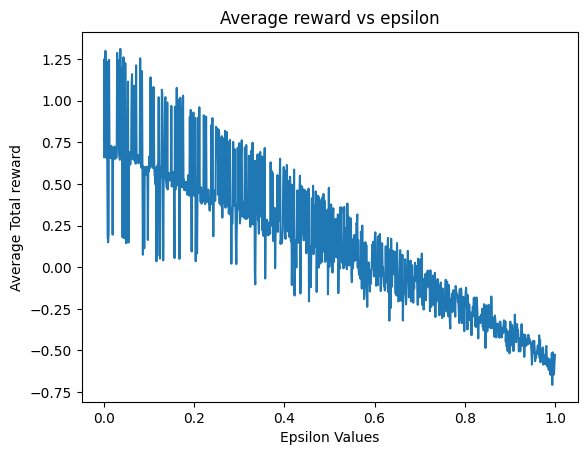

In [385]:
epsilon_values=np.linspace(0,1,1000)
iterations=1000
bandits = [Bandit(random.random()*4-2) for _ in range(10)]
cumav_rewards2=np.array([])

for j in range(len(epsilon_values)):
    rewards=np.zeros(len(bandits))    
    cumav_rewards=np.zeros(iterations)
    for i in range(iterations):
        run_epsilon_greedy(bandits,rewards,epsilon_values[j])
        cumav_rewards[i]=sum(rewards)/(i+1)
    cumav_rewards2=np.append(cumav_rewards2,cumav_rewards[-1])
    
epsilon_values.reshape(len(epsilon_values),1)
cumav_rewards2.reshape(len(epsilon_values),1)
dataset=np.column_stack((epsilon_values,cumav_rewards2))
dataset=pd.DataFrame(dataset)
dataset.plot(x=0, y=1,title="Average reward vs epsilon",xlabel="Epsilon Values",ylabel="Average Total reward",legend=False)
print('The optimal epsilon value is :',dataset.loc[dataset.index[dataset[1]==dataset[1].max()][0],0])


## Optimistic Initial Values

In [386]:
def run_optimistic_greedy(bandits, iterations, initial_value=10.0):
    n_arms = len(bandits)

    Q = np.full(n_arms, initial_value)
    counts = np.zeros(n_arms)
    rewards = np.zeros(iterations)

    for i in range(iterations):
        action = np.argmax(Q)

        reward = bandits[action].pullLever()
        rewards[i] = reward

        counts[action] += 1
        Q[action] += (reward - Q[action]) / counts[action]
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

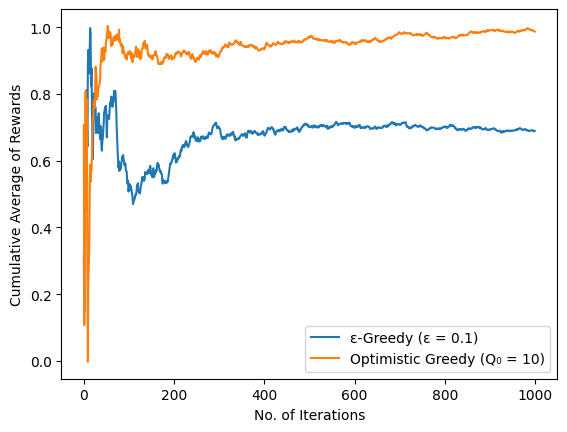

In [389]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]
n=len(bandits)
iterations=1000
rewards=np.zeros(len(bandits))    
cumav_rewards=np.zeros(iterations)

for i in range(iterations):
    run_epsilon_greedy(bandits,rewards,epsilon)
    cumav_rewards[i]=sum(rewards)/(i+1)
    

df=pd.DataFrame(cumav_rewards)

plt.plot(df,label="ε-Greedy (ε = 0.1)")

reward_optimistic=run_optimistic_greedy(bandits,iterations,10)
cumav_optimistic = np.cumsum(reward_optimistic) / (np.arange(iterations) + 1)
plt.plot(cumav_optimistic, label="Optimistic Greedy (Q₀ = 10)")
plt.xlabel("No. of Iterations")
plt.ylabel("Cumulative Average of Rewards")
plt.legend()
plt.show()

In [ ]:
#UCB Skipped